#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt
import forestplot as fp

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('re_0826.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
                ..
주당근로시간           0
주당근로시간_binary    0
직장에서의복리후생제공여부    0
보험가입여부           0
직장만족도            0
Length: 141, dtype: int64

In [5]:
df_copy = df.copy()

In [6]:
df_copy.LongWork2.value_counts()

LongWork2
0    4356
1     661
Name: count, dtype: int64

In [11]:
df_copy.나이.describe()

count   5017.00000
mean      25.91559
std        2.17905
min       21.00000
25%       24.41667
50%       25.75000
75%       27.16667
max       34.83333
Name: 나이, dtype: float64

In [12]:
daegu = df_copy[df_copy['사업체지역']=='대구'].copy()
daegu = daegu[(daegu['나이']>=20)&(daegu['나이']<=29)]
print(daegu.나이.describe())

model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태) + C(결혼상태)''', daegu).fit()
model.summary()

count   256.00000
mean     25.58073
std       1.61274
min      21.66667
25%      24.41667
50%      25.50000
75%      26.91667
max      29.00000
Name: 나이, dtype: float64
         Current function value: 0.380700
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  256
Model:                          Logit   Df Residuals:                      250
Method:                           MLE   Df Model:                            5
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                0.009372
Time:                        16:42:05   Log-Likelihood:                -97.459
converged:                      False   LL-Null:                       -98.381
Covariance Type:            nonrobust   LLR p-value:                    0.8703
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -24.3475   1.52e+05     -0.000      1.000   -2.98e+05    2.98e+05
C(성별, Treatment("여자"))[T.남자]     0.4418      0.440      1.003      0.316      -0.421       1.305
C(건강상태)[T.건강하지않다]                0.1332      0.547      0.244      0.808      -0.939       1.205
C(건강상태)[T.보통이다]                  0.0941      0.439      0.214      0.830      -0.766       0.954
C(결혼상태)[T.미혼]                   21.7669   1.52e+05      0.000      1.000   -2.98e+05    2.98e+05
age                              0.0161      0.137      0.117      0.906      -0.253       0.285
================================================================================================
"""

In [8]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:245.75606657003863




,OR,Lower CI,Upper CI
Intercept,0.00582,0.00005,0.68475
"C(성별, Treatment(""여자""))[T.남자]",1.06293,0.50700,2.22846
C(건강상태)[T.건강하지않다],1.07635,0.37302,3.10586
C(건강상태)[T.보통이다],1.17090,0.55815,2.45632
C(결혼상태)[T.미혼],0.07624,0.00746,0.77890
age,1.25151,1.07563,1.45614


In [9]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(대학지역,Treatment('비수도권')) + C(전공일치,Treatment("맞지않다")) 
    + 학점 + C(재학중일자리경험,Treatment('없다'))''', daegu).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.369125
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  265
Model:                          Logit   Df Residuals:                      254
Method:                           MLE   Df Model:                           10
Date:                Mon, 21 Aug 2023   Pseudo R-squ.:                  0.1556
Time:                        15:08:38   Log-Likelihood:                -97.818
converged:                       True   LL-Null:                       -115.85
Covariance Type:            nonrobust   LLR p-value:                 8.228e-05
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -7.1630      2.352     -3.046      0.002     -11.772      -2.554
C(성별, Treatment("여자"))[T.남자]             0.0937      0.418      0.224      0.823      -0.725       0.913
C(건강상태, Treatment("건강하지않다"))[T.건강하다]    -0.0790      0.614     -0.129      0.898      -1.282       1.124
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.3148      0.648      0.486      0.627      -0.955       1.584
C(결혼상태, Treatment("미혼"))[T.기혼]           2.4178      1.253      1.929      0.054      -0.039       4.874
C(대학지역, Treatment('비수도권'))[T.수도권]       -1.0223      1.085     -0.942      0.346      -3.149       1.104
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.5885      0.478      1.230      0.219      -0.349       1.526
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.7660      0.449      1.705      0.088      -0.114       1.646
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.9627      0.394     -2.440      0.015      -1.736      -0.190
나이                                       0.2530      0.087      2.923      0.003       0.083       0.423
학점                                      -0.4861      0.347     -1.401      0.161      -1.166       0.194
========================================================================================================
"""

In [10]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:217.63635877214747




,OR,Lower CI,Upper CI
Intercept,0.00077,0.00001,0.07777
"C(성별, Treatment(""여자""))[T.남자]",1.09822,0.48421,2.49084
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",0.92405,0.27737,3.07844
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",1.37002,0.38500,4.87525
"C(결혼상태, Treatment(""미혼""))[T.기혼]",11.22140,0.96222,130.86409
"C(대학지역, Treatment('비수도권'))[T.수도권]",0.35976,0.04291,3.01615
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",1.80135,0.70538,4.60016
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",2.15109,0.89189,5.18812
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.38184,0.17624,0.82733
나이,1.28793,1.08697,1.52604


In [19]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', daegu).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.287214
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                  238
Model:                          Logit   Df Residuals:                      220
Method:                           MLE   Df Model:                           17
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.2250
Time:                        16:47:32   Log-Likelihood:                -68.357
converged:                       True   LL-Null:                       -88.201
Covariance Type:            nonrobust   LLR p-value:                  0.001432
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.3239      4.260     -0.076      0.939      -8.673       8.025
C(성별, Treatment('여자'))[T.남자]                  0.5393      0.541      0.997      0.319      -0.521       1.600
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.0296      0.827      0.036      0.971      -1.591       1.650
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.4242      0.847      0.501      0.616      -1.236       2.084
C(대학지역, Treatment('비수도권'))[T.수도권]            -0.7760      1.197     -0.648      0.517      -3.122       1.570
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.7012      0.605      1.158      0.247      -0.485       1.888
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.5030      0.590      0.852      0.394      -0.654       1.660
C(재학중일자리경험, Treatment('없다'))[T.있다]           -1.0019      0.490     -2.046      0.041      -1.962      -0.042
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]        0.3962      0.958      0.413      0.679      -1.482       2.274
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -1.6153      1.019     -1.585      0.113      -3.613       0.383
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]        0.8130      1.424      0.571      0.568      -1.977       3.603
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]       3.9737      1.234      3.221      0.001       1.556       6.391
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]     -1.7004      1.463     -1.162      0.245      -4.568       1.168
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]    -2.4865      1.263     -1.969      0.049      -4.962      -0.011
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -2.8287      1.312     -2.156      0.031      -5.400      -0.257
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.5343      0.512     -1.044      0.297      -1.538       0.469
나이                                            0.0100      0.161      0.062      0.950      -0.306       0.326
학점                                           -0.6790      0.402     -1.690      0.091      -1.467       0.109
=============================================================================================================
"""

In [20]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:172.71394686288318




,OR,Lower CI,Upper CI
Intercept,0.72330,0.00017,3057.76647
"C(성별, Treatment('여자'))[T.남자]",1.71478,0.59370,4.95274
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.03004,0.20378,5.20666
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.52844,0.29058,8.03940
"C(대학지역, Treatment('비수도권'))[T.수도권]",0.46023,0.04408,4.80519
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",2.01612,0.61558,6.60309
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.65367,0.51984,5.26048
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.36719,0.14060,0.95892
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",1.48620,0.22718,9.72267
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.19883,0.02697,1.46603


In [21]:
odds_ratios.index = ['절편', '성별 Ref:여자|남자',
       '건강상태 Ref:건강하지않다|건강하다',
       '건강상태 Ref:건강하지않다|보통이다',
       '대학지역,Ref:비수도권|수도권',
       '전공일치 Ref:맞지않다|보통이다',
       '전공일치 Ref:맞지않다|잘맞다',
       '재학중일자리경험 Ref:없다|있다',
       '삶의만족도_개인 REF:그렇지않다|그렇다',
       '삶의만족도_개인 REF:그렇지않다|보통이다',
       '삶의만족도_관계 REF:그렇지않다|그렇다',
       '삶의만족도_관계 REF:그렇지않다|보통이다',
       '삶의만족도_소속집단 REF:그렇지않다|그렇다',
       '삶의만족도_소속집단 REF:그렇지않다|보통이다',
       '업무만족도 REF:그렇지않다|그렇다',
       '업무만족도 REF:그렇지않다|보통이다', '나이', '학점']

In [49]:
# odds_ratios['label'] = ['intercept', 'Gender Ref:Female|Male', 'State of health Ref:Unhealthy|Healthy', 'Health Ref: Unhealthy|Fair',
#               'Marital status Ref:Single|Married', 'University area, Ref: Non-metropolitan area | Metropolitan area',
#               'Major Match Ref:Inconsistent|Normal', "Major Match Ref:Doesn't Match|Fit",
#               'Job experience while in school Ref:No|Yes', 'Life Satisfaction_Individual REF:No|Yes',
#               'Life Satisfaction_Individual REF:Not so|Average', 'Life Satisfaction_Relationship REF:No',
#               'Life Satisfaction_Relationship REF:Not so|Normal', 'Life Satisfaction_Group Affiliation REF:No|Yes',
#               'Life Satisfaction_Group Affiliation REF:Not so|Normal', 'Job Satisfaction REF: No|Yes',
#               'Job Satisfaction REF:Disagree|Average', 'Age', 'score']

# odds_ratios.index = ['intercept', 'Gender Ref:Female|Male', 'State of health Ref:Unhealthy|Healthy', 'Health Ref: Unhealthy|Fair',
#               'Marital status Ref:Single|Married', 'University area, Ref: Non-metropolitan area | Metropolitan area',
#               'Major Match Ref:Inconsistent|Normal', "Major Match Ref:Doesn't Match|Fit",
#               'Job experience while in school Ref:No|Yes', 'Life Satisfaction_Individual REF:No|Yes',
#               'Life Satisfaction_Individual REF:Not so|Average', 'Life Satisfaction_Relationship REF:No',
#               'Life Satisfaction_Relationship REF:Not so|Normal', 'Life Satisfaction_Group Affiliation REF:No|Yes',
#               'Life Satisfaction_Group Affiliation REF:Not so|Normal', 'Job Satisfaction REF: No|Yes',
#               'Job Satisfaction REF:Disagree|Average', 'Age', 'score']

In [22]:
odds_ratios['label'] = odds_ratios.index
odds_ratios.shape

(18, 4)

In [24]:
odds_ratios['group'] = ['절편','성별','건강상태','건강상태', '대학지역','전공일치','전공일치',
                         '재학중일자리경험','삶의 만족도_개인','삶의 만족도_개인','삶의 만족도_관계',
                         '삶의 만족도_관계','삶의 만족도_소속집단','삶의 만족도_소속집단','업부만족도',
                         '업무만족도','나이','학점']

# odds_ratios['group'] = ['intercept', 'gender', 'health status', 'health status', 'marital status', 'college region',
#                         'major match', 'major match', 'Job experience while attending school',
#                         'Life satisfaction_individual', 'Life satisfaction_individual',
#                         'Life satisfaction_relationship', 'Life satisfaction_relationship',
#                         'Life satisfaction_member group', 'life satisfaction_member group',
#                         'job satisfaction', 'Job Satisfaction', 'Age', 'Grade']

In [70]:
odds_ratios.head(3)

,OR,Lower CI,Upper CI,label,group
절편,0.00182,0.00001,0.32632,절편,intercept
성별 Ref:여자|남자,1.34447,0.54052,3.34414,성별 Ref:여자|남자,gender
건강상태 Ref:건강하지않다|건강하다,0.92491,0.20188,4.23753,건강상태 Ref:건강하지않다|건강하다,health


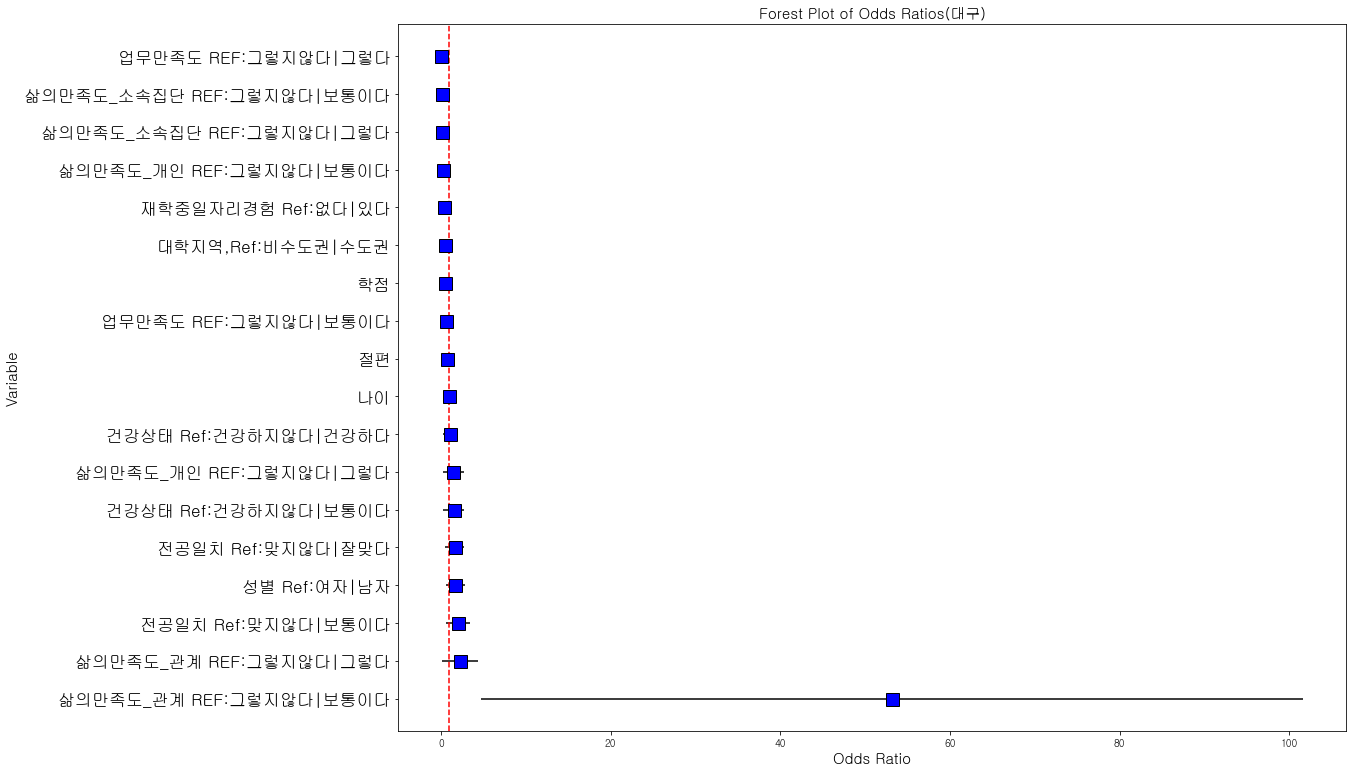

In [25]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(대구)', fontsize=15)

# Show the plot
plt.show()

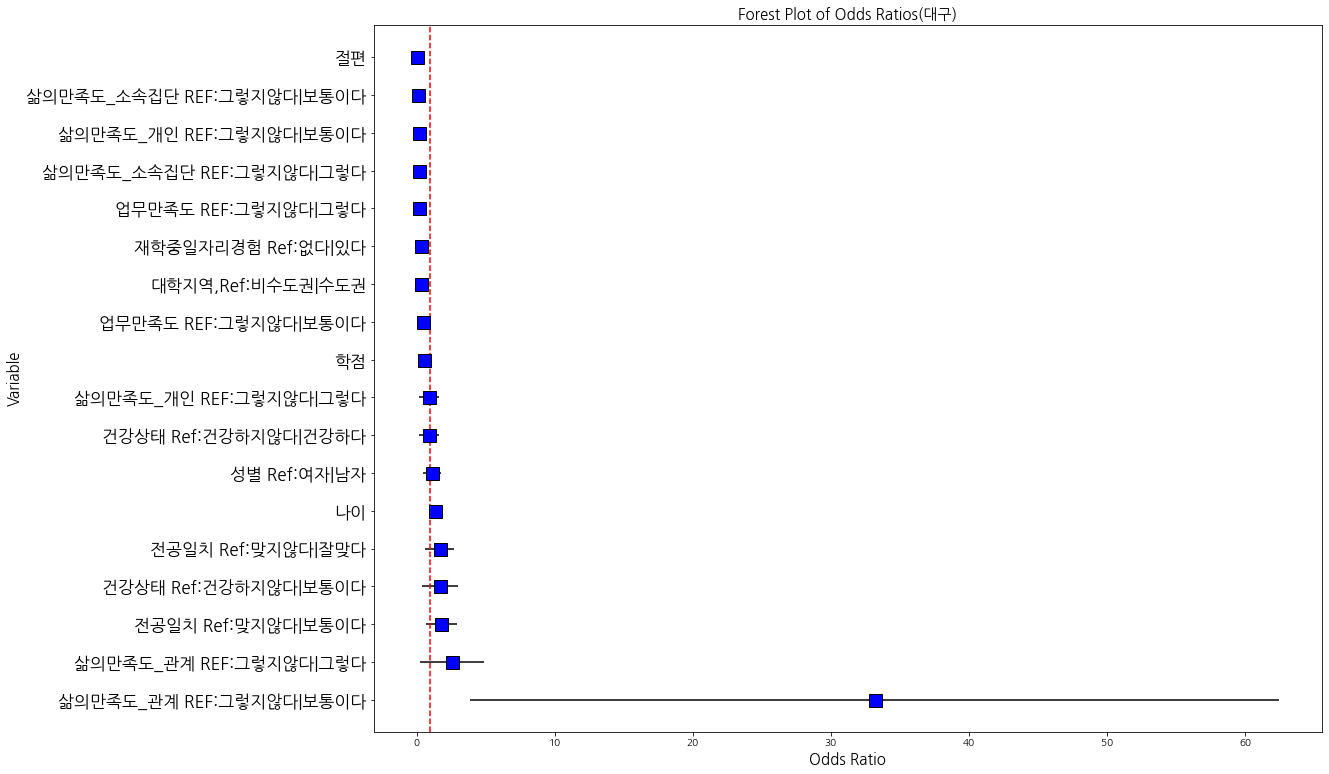

In [ ]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios.loc[var, "OR"], odds_ratios.loc[var, "Lower CI"], odds_ratios.loc[var, "Upper CI"]) for var in odds_ratios.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='s', color='black', 
             markersize=13, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios(대구)', fontsize=15)

# Show the plot
plt.show()

#### Using Forest plot packages

![Example Image](https://raw.githubusercontent.com/LSYS/forestplot/main/docs/images/main.png)

In [51]:
odds_ratios.group.unique()

array(['intercept', 'gender', 'health status', 'marital status',
       'college region', 'major match',
       'Job experience while attending school',
       'Life satisfaction_individual', 'Life satisfaction_relationship',
       'Life satisfaction_member group', 'life satisfaction_member group',
       'job satisfaction', 'Job Satisfaction', 'Age', 'Grade'],
      dtype=object)

<Figure size 1224x1080 with 0 Axes>

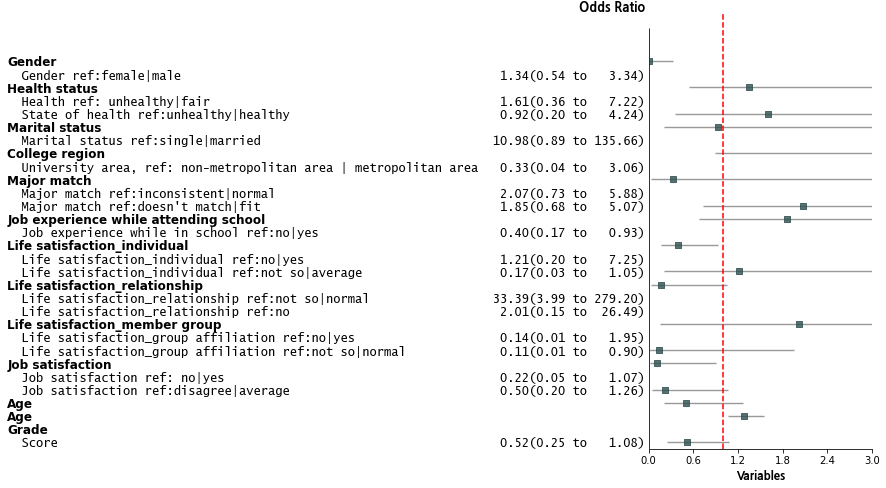

In [66]:
plt.figure(figsize=(17,15))

fp.forestplot(odds_ratios,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              moerror='moerror',
              varlabel='label',
              capitalize='capitalize',
              groupvar='group',
              ll="Lower CI",  # column containing conf. int. lower limit
              hl="Upper CI",  # column containing conf. int. upper limit
                # column containing variable label
              ylabel="Odds Ratio",  # y-label title
              xlabel="Variables",  # x-label title
              group_order=['intercept', 'gender', 'health status', 'marital status',
       'college region', 'major match',
       'Job experience while attending school',
       'Life satisfaction_individual', 'Life satisfaction_relationship',
       'Life satisfaction_member group', 'life satisfaction_member group',
       'job satisfaction', 'Job Satisfaction', 'Age', 'Grade'],
              sort=True
              )

plt.xlim(left=0, right=3) 
plt.axvline(x=1, color='red', linestyle='--')
plt.show()